In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [29]:
data = pd.read_csv(r"C:\Users\Krutarth\Desktop\Datasets\greyatom_logistic\train.csv")
data.drop(columns=['Id'], inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,25,0,30.30,0,0,3,2632.9920,1
1,26,0,19.80,1,0,3,3378.9100,0
2,44,1,31.35,1,1,0,39556.4945,1
3,44,1,30.69,2,0,2,7731.4271,0
4,29,0,24.60,2,0,3,4529.4770,0


In [30]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1070 non-null   int64  
 1   sex             1070 non-null   int64  
 2   bmi             1070 non-null   float64
 3   children        1070 non-null   int64  
 4   smoker          1070 non-null   int64  
 5   region          1070 non-null   int64  
 6   charges         1070 non-null   float64
 7   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 67.0 KB


In [32]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.030841,0.495327,30.490196,1.128037,0.203738,1.516822,13262.895208,0.568224
std,13.951271,0.500212,6.109707,1.211675,0.402965,1.110035,12125.948212,0.495555
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.030000,0.000000,0.000000,1.000000,4651.971162,0.000000
50%,39.000000,0.000000,30.140000,1.000000,0.000000,2.000000,9341.303300,1.000000
75%,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,17117.636460,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [33]:
data.insuranceclaim.value_counts()

1    608
0    462
Name: insuranceclaim, dtype: int64

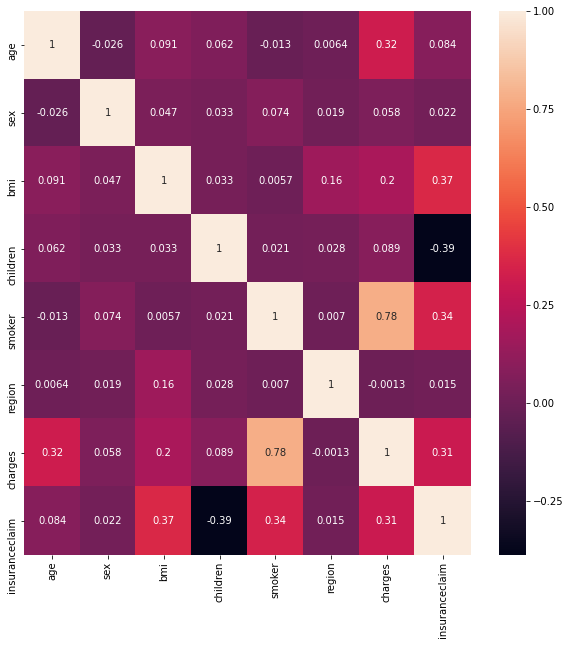

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

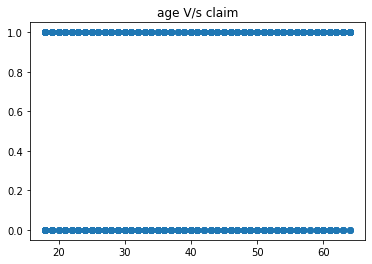

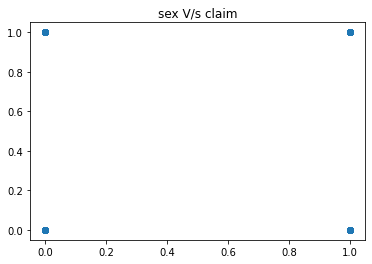

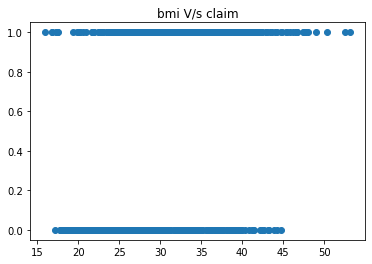

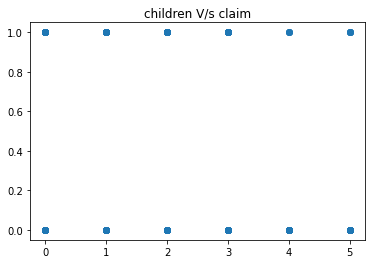

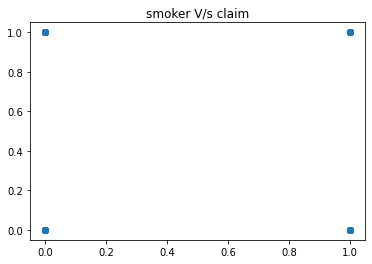

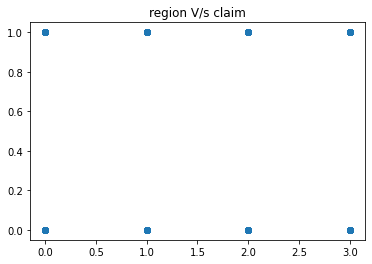

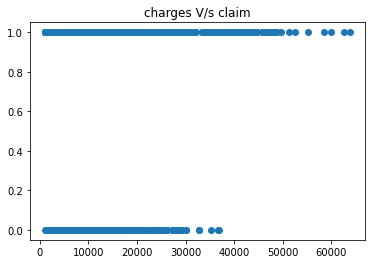

In [35]:
for i in data.columns[:-1]:
    plt.scatter(data[i],data.insuranceclaim)
    plt.title(f"{i} V/s claim")
    plt.show()

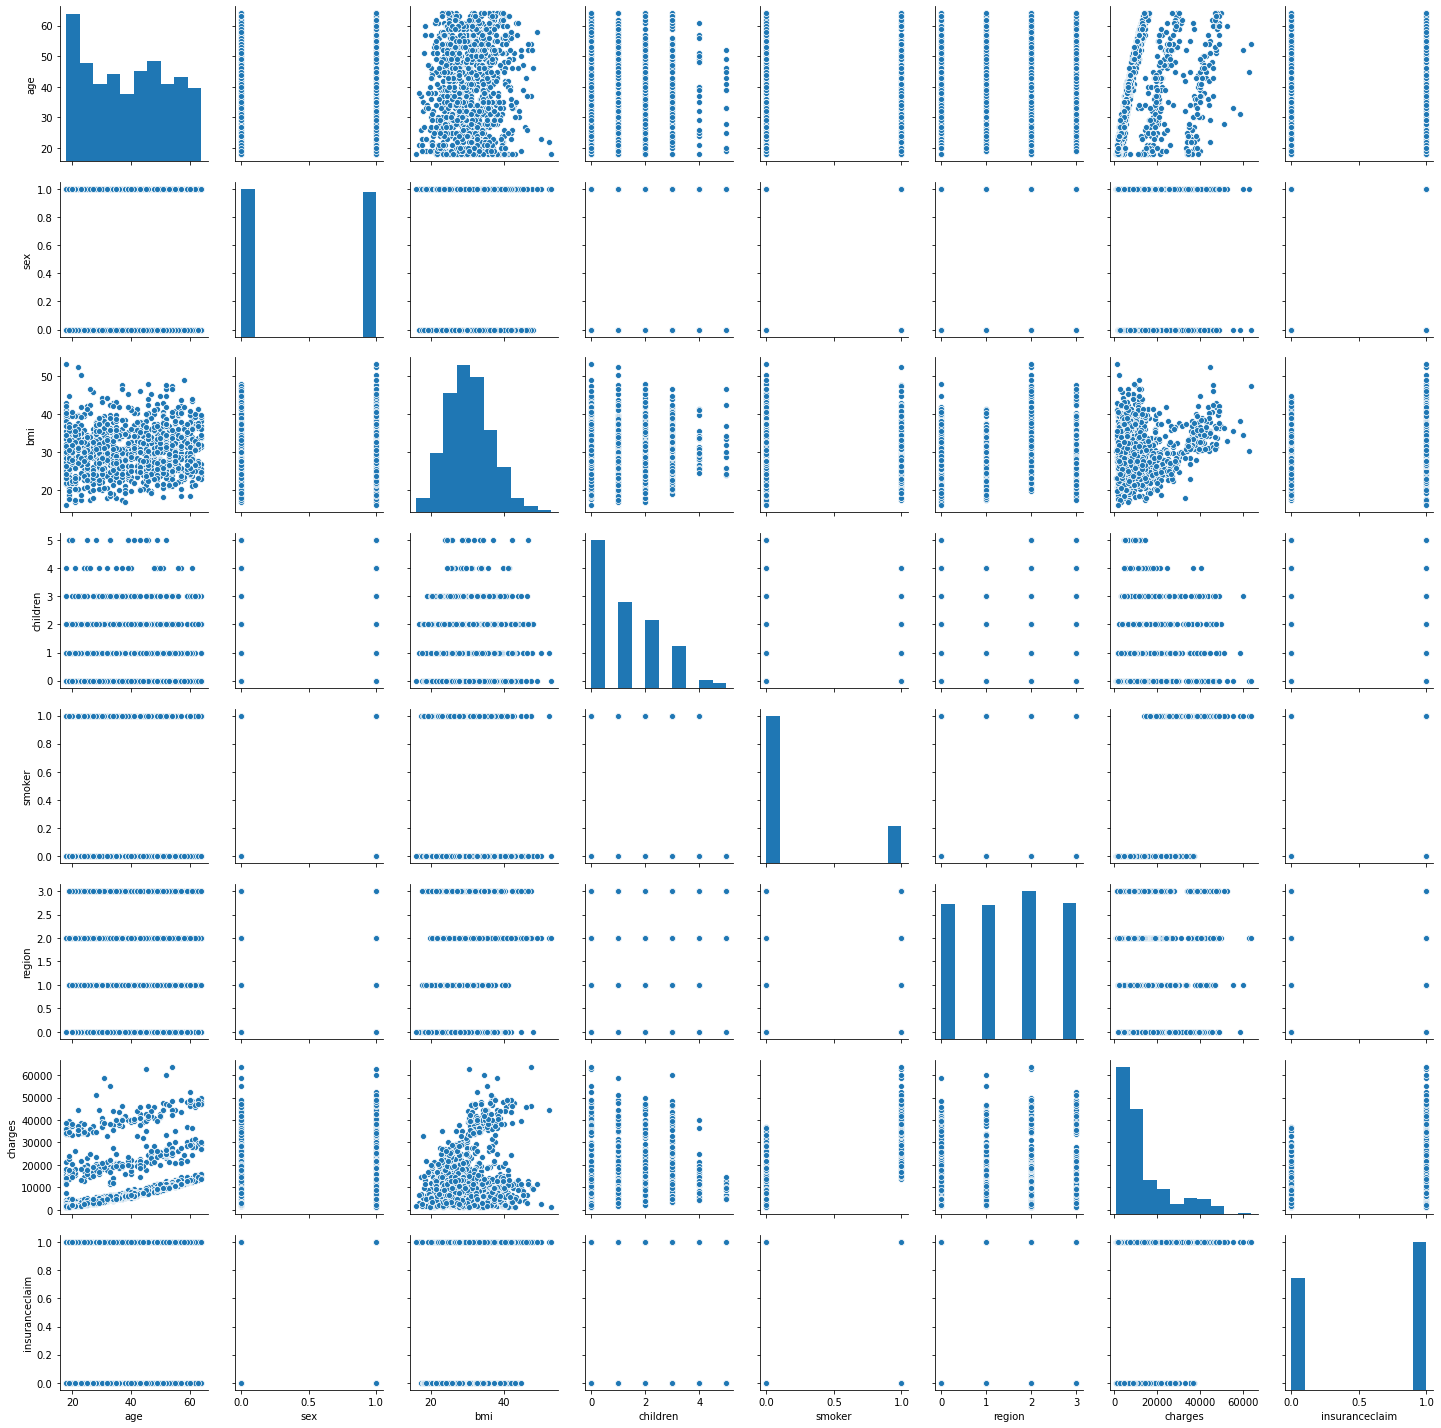

In [36]:
sns.pairplot(data)
plt.show()

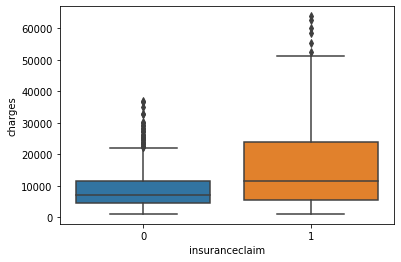

In [37]:
sns.boxplot(y=data.charges, x=data.insuranceclaim)
plt.show()

In [38]:
scaler= MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(data.drop(columns='insuranceclaim')))
train['insuranceclaim'] = data.insuranceclaim
train.columns = data.columns
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,0.152174,0.0,0.385795,0.0,0.0,1.000000,0.024121,1
1,0.173913,0.0,0.103309,0.2,0.0,1.000000,0.036027,0
2,0.565217,1.0,0.414044,0.2,1.0,0.000000,0.613496,1
3,0.565217,1.0,0.396287,0.4,0.0,0.666667,0.105502,0
4,0.239130,0.0,0.232446,0.4,0.0,1.000000,0.054392,0


In [42]:
X = train.iloc[:,:-1]
y = train.insuranceclaim

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = roc_auc_score(y_test, y_pred)
score

0.8756862745098041

In [57]:
test = pd.read_csv(r"C:\Users\Krutarth\Desktop\Datasets\greyatom_logistic\test.csv")
Id = pd.DataFrame(test.Id)
test.drop(columns=['Id'], inplace=True)
test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,0,42.940,3,0,1,6360.99360
1,19,0,40.500,0,0,3,1759.33800
2,58,1,34.865,0,0,0,11944.59435
3,60,0,32.450,0,1,2,45008.95550
4,44,0,36.955,1,0,1,8023.13545


In [51]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X,y)

In [54]:
test = scaler.transform(test)
predictions = log_reg.predict(test)

In [58]:
Id['insuranceclaim'] = predictions
Id.head()

,Id,insuranceclaim
0,811,0
1,973,1
2,308,1
3,845,1
4,1050,1


In [59]:
Id.to_csv('submission.csv', index=False)

In [60]:
cd

C:\Users\Krutarth
